# Prosper Loan Data Explanatory Analysis
## by Daniel Brai

## Investigation Overview
In this investigation, I wanted to look at if different loan characteristics could be used to predict an individual's APR (Annual Percentage Rate). My main focus with the Prosper loan dataset were: BorrowerAPR, LoanOriginalAmount, StatedMonthlyIncome and EmploymentStatus.

## Dataset Overview
This Project conducts a Exploratory Data Analysis on The Prosper Loan Dataset. This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After some wrangling, the new dataset consists of 113912 loans with the 10 variables. 

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_loan = pd.read_csv('prosperLoanData.csv')

In [5]:
print('Basic overview of the Prosepr Loan Dataset: ')
df_loan.head(10)

Basic overview of the Prosepr Loan Dataset: 


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
# Selecting the relevant features I want out this dataset
# first I make a copy of the df_loan dataset
df_loan_copy = df_loan.copy()
df_loan_copy = df_loan_copy[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount']]

# getting random samples of the dataset
df_loan_copy.sample(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
2937,60,Completed,0.19364,0.1699,B,Other,Self-employed,"$50,000-74,999",4166.666667,5000
88563,36,Current,0.21025,0.1734,C,Analyst,Employed,"$100,000+",9755.833333,10000
84724,36,Defaulted,0.29967,0.2895,NaN,Other,Not available,Not displayed,4666.666667,1911
95361,60,Current,0.23318,0.2085,D,Computer Programmer,Employed,"$50,000-74,999",4416.666667,13000
41300,60,Current,0.17839,0.1550,B,Laborer,Employed,"$50,000-74,999",5416.666667,20000


In [7]:
#  Getting the general statistics
df_loan_copy.describe()

,Term,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,LoanOriginalAmount
count,113937.000000,113912.000000,113937.000000,1.139370e+05,113937.00000
mean,40.830248,0.218828,0.192764,5.608026e+03,8337.01385
std,10.436212,0.080364,0.074818,7.478497e+03,6245.80058
min,12.000000,0.006530,0.000000,0.000000e+00,1000.00000
25%,36.000000,0.156290,0.134000,3.200333e+03,4000.00000
50%,36.000000,0.209760,0.184000,4.666667e+03,6500.00000
75%,36.000000,0.283810,0.250000,6.825000e+03,12000.00000
max,60.000000,0.512290,0.497500,1.750003e+06,35000.00000


In [8]:
# Getting the general information
df_loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
Term                     113937 non-null int64
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
BorrowerRate             113937 non-null float64
ProsperRating (Alpha)    84853 non-null object
Occupation               110349 non-null object
EmploymentStatus         111682 non-null object
IncomeRange              113937 non-null object
StatedMonthlyIncome      113937 non-null float64
LoanOriginalAmount       113937 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 8.7+ MB


In [9]:
# Getting value_counts() for important columns in the df_loan_copy table
df_loan_copy['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [10]:
df_loan_copy['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [11]:
df_loan_copy['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [12]:
df_loan_copy['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [13]:
# checking if the BorrowerAPR column has any null values
df_loan_copy['BorrowerAPR'].isnull().sum()

25

In [14]:
# Convert to Categorical Data Type

# defining the categories
dict = {'LoanStatus': ['Current','Completed','Chargedoff', 'Defaulted','Past Due (1-15 days)',
                       'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)',
                       'FinalPaymentInProgress','Past Due (>120 days)','Cancelled'],
        'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
        'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
        'IncomeRange': ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed','$1-24,999','Not employed','$0']
        }

# defining to function to take care of the conversion
def convert_to_category(dictionary):
    '''A fuction to convert any inputed dictionary of an integer type to a categorical type'''
    for var in dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = dict[var])
        df_loan_copy[var] = df_loan_copy[var].astype(ordered_var)

# calling the function with the variable dict
convert_to_category(dict)

In [15]:
# checking if they have been converted to a Categorical Data type
df_loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
Term                     113937 non-null int64
LoanStatus               113937 non-null category
BorrowerAPR              113912 non-null float64
BorrowerRate             113937 non-null float64
ProsperRating (Alpha)    84853 non-null category
Occupation               110349 non-null object
EmploymentStatus         111682 non-null category
IncomeRange              113937 non-null category
StatedMonthlyIncome      113937 non-null float64
LoanOriginalAmount       113937 non-null int64
dtypes: category(4), float64(3), int64(2), object(1)
memory usage: 5.7+ MB


In [16]:
# Quality Issue 2: Drop rows with null BorrowerAPR values
df_loan_copy = df_loan_copy[df_loan_copy['BorrowerAPR'].notnull()]

In [17]:
# checking if there are any row that have a null BorowerAPR values
df_loan_copy[df_loan_copy['BorrowerAPR'].isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount


In [18]:
# checking the new shape
df_loan_copy.shape

(113912, 10)

## Distribution of BorrowerAPR for a loan

The distribution of the BorrowerAPR is random; it has many peaks. There is an peak around 0.1 the lowest, 0.2 and somewhere between 0.35 and 0.36 which has the highest peak in the distribution.
Additionally, we can deduce from the histogram above that there are few people with a BorrowerAPR greater than 0.4

In [19]:
# getting general statistics
df_loan_copy['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

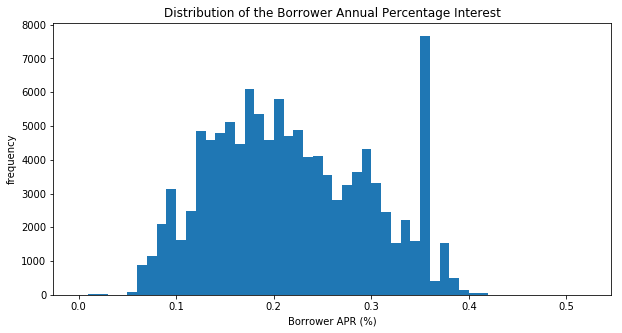

In [20]:
# plotting a histogram covering the distribution of the BorrowerAPR
bins = np.arange(0, df_loan_copy['BorrowerAPR'].max()+0.01, 0.01)

plt.figure(figsize = [10, 5])
plt.title('Distribution of the Borrower Annual Percentage Interest')
plt.xlabel('Borrower APR (%)')
plt.ylabel('frequency')
plt.hist( data = df_loan_copy, x = 'BorrowerAPR', bins = bins );

## Distribution of LoanOriginalAmount

In the distribution, we can see large spikes in the loan amount borrowed by individuals from 10 thounsand dollars, 15 thousand US Dollars, 20 thousand US Dollars, 25 thousand US Dollars and 35 thousand US Dollars. Also, we can see occasional spikes around below 10 thousands US Dollars and in between 10 thousand and 15 thosand US Dollars.

In [21]:
# getting general statistics
df_loan_copy['LoanOriginalAmount'].describe()

count    113912.000000
mean       8338.015661
std        6245.940592
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

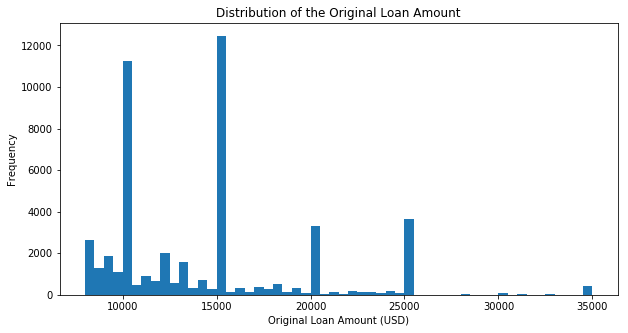

In [22]:
# plotting a histogram covering the distribution of the LoanOriginalAmount
bins = np.arange(8000, df_loan_copy['LoanOriginalAmount'].max()+500, 500)
plt.figure(figsize = [10, 5]);
plt.title('Distribution of the Original Loan Amount')
plt.xlabel('Original Loan Amount (USD)')
plt.ylabel('Frequency')
plt.hist(data = df_loan_copy, x = 'LoanOriginalAmount', bins = bins );

##  Employment status effect on an individual's eligiblity for a loan

In the distribution, we can see that the Individuals with a stable employment benefit the most when applying for a loan due to large number of 67135 individuals.

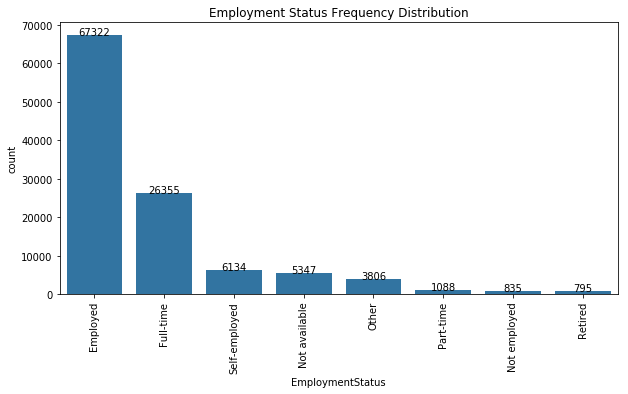

In [23]:
# A count plot covering the distribution of the Employment status
base_color = sb.color_palette()[0]
type_order = df_loan_copy['EmploymentStatus'].value_counts().index

plt.figure(figsize=[10, 5])
plt.title('Employment Status Frequency Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Frequency')

sb.countplot(data = df_loan_copy, x = 'EmploymentStatus', color = base_color, order = type_order);

locs, labels = plt.xticks(rotation=90)
job_counts = df_loan_copy['EmploymentStatus'].value_counts()

for loc, label in zip(locs, labels):
    count = job_counts[label.get_text()]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

## Distribution of StatedMonthlyIncome

The distribution of Stated monthly income is skewed right, that means a large number of individuals have their stated monthly income less than 30 thousand US Dollars. As such individuals with the income greater than 30 thousand US Dollars can be considered to be a very small portion of the entire dataset ( outliers )

In [24]:
# getting general statistics
df_loan_copy['StatedMonthlyIncome'].describe()

count    1.139120e+05
mean     5.606973e+03
std      7.478338e+03
min      0.000000e+00
25%      3.200000e+03
50%      4.666667e+03
75%      6.817083e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

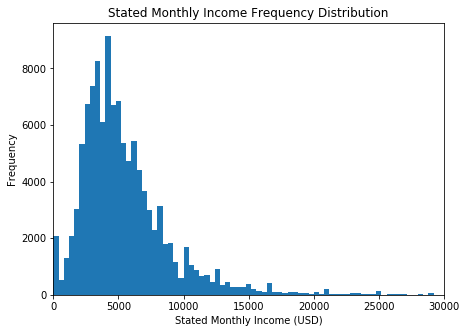

In [25]:
bins = np.arange(0, 40000, 400)

plt.figure(figsize=[7, 5])
plt.xlim(1, 30000)
plt.title('Stated Monthly Income Frequency Distribution')
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Frequency')
plt.hist(data = df_loan_copy, x = 'StatedMonthlyIncome', bins = bins);

In [26]:
# removing outliers after limiting the axes to 30000 USD
df_loan_copy = df_loan_copy[df_loan_copy['StatedMonthlyIncome'] <= 30000]

In [27]:
# check to see if there are any values > 30000
(df_loan_copy['StatedMonthlyIncome']>30000).sum()

0

The above plot shows that most individual who can get a loan from Prosper usually have an income range between 25 and 75 thousand US dollars but this plot does not actually show an relationship between income range and loan amount possibility.

## BorrowerAPR vs. StatedMontlyIncome and LoanOriginalAmount

Again, we can see that the plot depicts that the correlation coefficient of BorrowerAPR and Loan original amount is -0.323 as the scatterplot clearly shows in the previous scatter plot meaning these two variables are negatively correlated. Also, taking a look at the relationship between the Loan original amount and Stated monthly income, we can see that they are positively correlated with a correlation coefficient of 0.404.
Thus, we can extrapolate that borrowers with a high monthly income could loan more money because their BorrowerAPR will be lower compared to those with lower monthly income. 

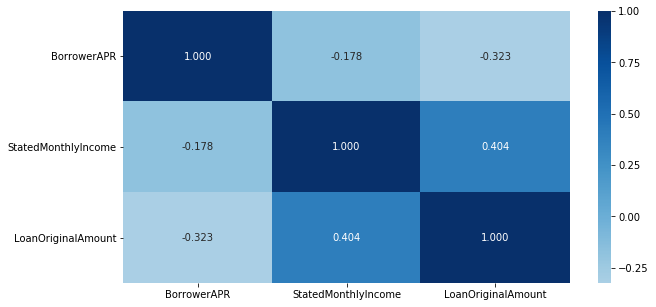

In [34]:
# Scatter plot showing the correlation between three variables
data = df_loan_copy[['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount']]
plt.figure(figsize = [10, 5])
sb.heatmap(data.corr(), annot = True, fmt = '.3f', cmap = 'Blues', center = 0);

## Relationship between Borrower APR and Loan original amount across Prosper rating 

The previous plot shows a drastic difference in the Loan original amount and  BorrowerAPR across the Prosper rating types.
We can see that the Loan original amount is directly proportional to the Prosper rating as such an increase in one causes an increase in the other one while the borrowerAPR decreases as there is an increase in Prosper rating. 

Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

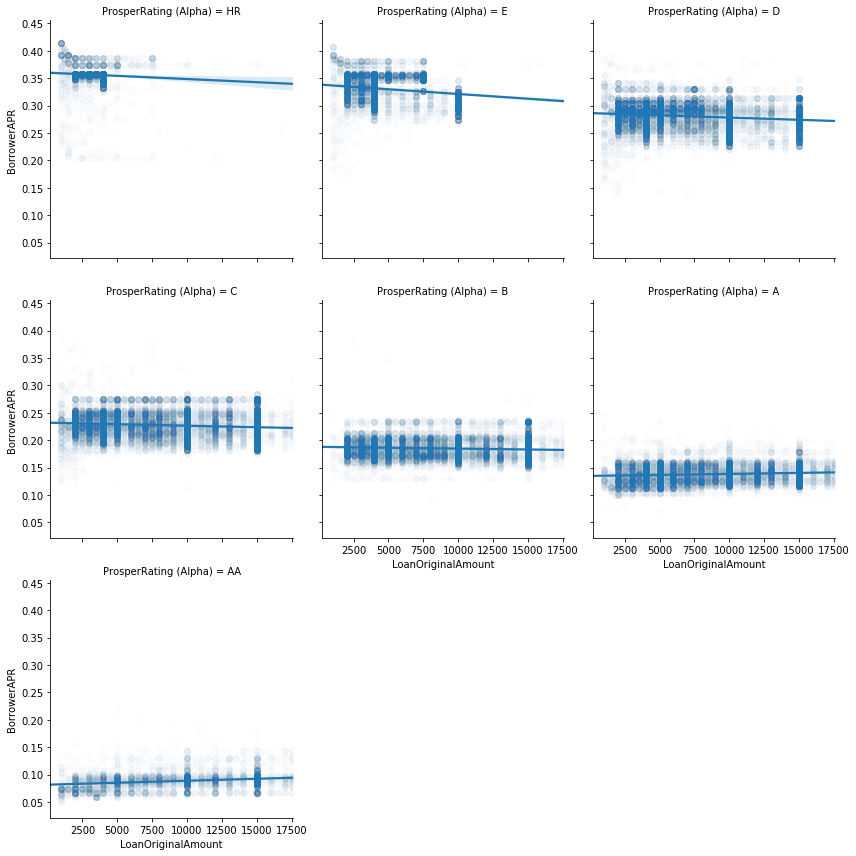

In [39]:
# plotting
g = sb.FacetGrid(data = df_loan_copy, col='ProsperRating (Alpha)', col_wrap = 3, size = 4, margin_titles = True)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':1/100});

## Relationship between Borrower APR and Prosper rating across Loan Term

Here, we can see that the Prosper rating is directly proportional to the BorrowerAPR as such an increase in one causes an increase in the other one. Again, an increase in Prosper rating. Interestingly, the relationship between borrower APR and term turns from negative to slightly positive when the Prosper ratings are A and AA. This may because people with A or AA ratings tend to loan more money.

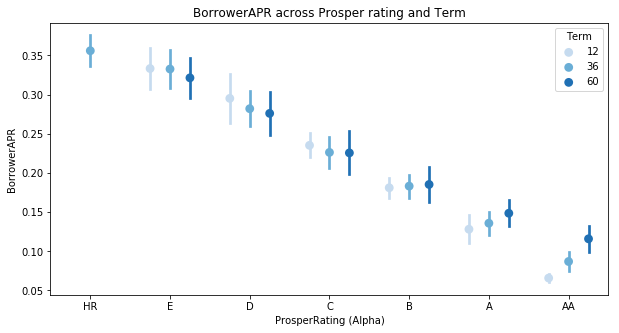

In [40]:
# plotting
plt.figure(figsize = [10,5])
plt.title('BorrowerAPR across Prosper rating and Term')
sb.pointplot(data = df_loan_copy, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'Blues' , linestyles = '', ci = 'sd', dodge = 0.5);

### Term across BorrowerAPR and Loan original amount

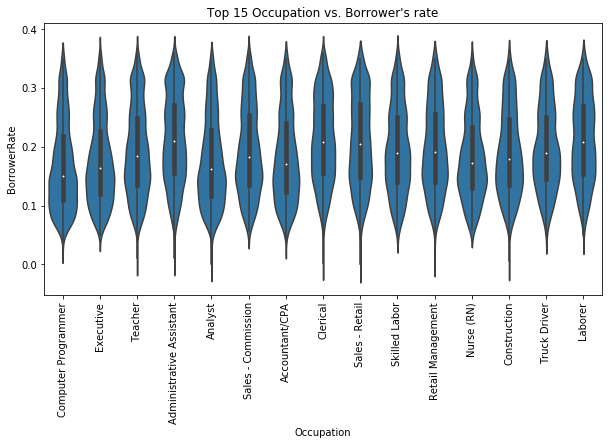

In [35]:
# voilin plot showing the distribution between the two variables
plt.figure(figsize=[10, 5])

type_order = df_loan_copy['Occupation'].value_counts(normalize=True).sort_values(ascending=False).head(17).index
type_order = type_order[2:]

plt.title("Top 15 Occupation vs. Borrower's rate");
plt.xticks(rotation=90);
sb.violinplot(data = df_loan_copy, x = 'Occupation' , y =  'BorrowerRate', color = base_color, order = type_order);

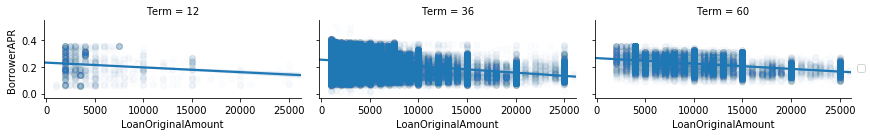

In [41]:
# plotting
g=sb.FacetGrid(data = df_loan_copy, aspect = 2, col = 'Term', col_wrap = 3, size = 2)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.02, scatter_kws={'alpha':1/80});
g.add_legend();

In the above plot, we can see a downward trend across all terms for the loan original amount for that we can deduce that as loan orignal amount increases the BorrowerAPR increases until reaching a constant point where no matter than loan taken the BorrowerAPR reamins somewhat constant.

In [ ]:
!jupyter nbconvert Prosper_loan_explanatory_data_analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_loan_explanatory_data_analysis.ipynb to slides
[NbConvertApp] Writing 661458 bytes to Prosper_loan_explanatory_data_analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Prosper_loan_explanatory_data_analysis.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
